# Heat Capacity of Solids

Continuing our discussion of how real systems differ from ideal gases, let's consider how heat capacities behave for solids. Imagine a solid with $N$ atoms can be modelled as a lattice, and that each atom is bonded to its neighbours by springs. This means there are 3$N$ springs in the system. As such, each atom is allowed to oscillate about its equilibrium position. Each "spring" has two quadratic modes of energy: one kinetic, and one potential, and so the equipartition of energy tells us that each spring has a mean energy
$$
    \langle E \rangle = 2 \times \frac{1}{2} k_{\rm B} T = k_{\rm B} T
$$
and that the mean energy of the system is then
$$
    \langle E \rangle = 3 N k_{\rm B} T
$$
The heat capacity of the solid is then
$$
    C = \frac{\partial \langle E \rangle}{\partial T} = 3 N k_{\rm B} = 3 R.
$$
where that last value is true for one mole of the substance. That is, the heat capacity should be constant in this picture - this is known as the Dulong-Petit law, and experiments have found that expectation value for the heat capacity is very close to what's observed in a lot of systems around room temperature. However, because of the third law of thermodynamics, we would expect the heat capacity to go to 0 at low temperatures, which this treatment does not reproduce. So how do we fix this?

## Einstein's Theory

The answer comes from Eintein's model. In this model, we again assume that all atoms are linked via a spring. However, the key insight here is that, in accordance with quantum mechanics, the springs will only be able to oscillate with discrete energies. These discrete units of vibrational energy are known as **phonons**.

Ok, let's assume we have such a lattice, and that every atom is oscillating about their equilibria positions independently of all the other atoms. The frequency of the oscillations will be given by
$$
    \nu_E = \frac{\omega_{\rm E}}{2\pi}
$$
Following the prescription of quantum mechanics, a single oscillator will have an energy of
$$
    \epsilon_r = \hbar \omega_{\rm E} \left(r+\frac{1}{2}\right)
$$
The partition function for a single oscillator in the system is
$$
    Z_1 = \sum_{n=0}^{\infty} {\rm e}^{\beta (n+1/2)\hbar \omega_{\rm E}} =\frac{{\rm e}^{-\beta \hbar \omega_{\rm E}/2}}{1-{\rm e}^{-\beta \hbar \omega_{\rm E}}}
$$
as derived in Lecture 10 (and as a part of problem set 3). The mean energy of a single oscillator is then
\begin{align}
    U_1 &= -\left(\frac{\partial\ln(Z_1)}{\partial \beta}\right)\\
        &= -\left(\frac{\partial\ln(\frac{{\rm e}^{-\beta \hbar \omega_{\rm E}/2}}{1-{\rm e}^{-\beta \hbar \omega_{\rm E}}})}{\partial \beta}\right)\\
        &= -\left(\frac{\partial\ln({\rm e}^{-\beta \hbar \omega_{\rm E}/2})}{\partial \beta}\right) -\left(\frac{\partial\ln({1-{\rm e}^{-\beta \hbar \omega_{\rm E}}})}{\partial \beta}\right)\\
        &= \frac{\hbar \omega_{\rm E}}{2}+\frac{\hbar \omega_{\rm E}{\rm e}^{-\beta \hbar \omega_{\rm E}}}{1-{\rm e}^{-\beta \hbar \omega_{\rm E}}}\\
        &= \frac{\hbar \omega_{\rm E}}{2}+\frac{\hbar \omega_{\rm E}}{{\rm e}^{\beta \hbar \omega_{\rm E}}-1}\\
\end{align}
So if we have $3 N$ phonons, then the internal energy is
$$
    U = 3 N U_1
$$
The heat capacity of this solid can then be calculated using
$$
    C_{\rm V} = \left( \frac{\partial \langle U \rangle}{\partial T} \right)_V
$$
which gives
\begin{align}
    C_{\rm V} &= 3 N \left( - \frac{(\hbar \omega_{\rm E})^2 {\rm e}^{\beta \hbar \omega_{\rm E}}} {({\rm e}^{\beta \hbar \omega_{\rm E}}-1)^2} \right) \left( \frac{-1}{k_{\rm B}T^2} \right).\\
\end{align}
If we now define the Einstein Temperature,$\Theta_{\rm E} = \frac{\hbar \omega_{\rm E}}{k_{\rm B}}$ and $x=\frac{\Theta_{\rm E}}{T}$, then this simplifies to
$$
    C_{\rm V} = 3 N k_{\rm B} \frac{ x^2 {\rm e}^{x}} {({\rm e}^{x}-1)^2}
$$
So now the question we have to ask is: does this expression for the heat capacity both satisfy the Dulong-Petit law (that is, at high temperatures, $C_{\rm V} = 3R$, and also the Third law (that is, at low temperatures, it should go to 0).

- In the high temperature limit, when $T\gg \Theta_{\rm E}$, then $x \ll 1$. If we Taylor expand $e^x$ around $x=0$, then $e^x=1+x+...$ and thus $C_{\rm V}= 3 N k_{\rm B} = 3 R$ for 1 mole, as required
- In the low temperature limit, when $T\ll \Theta_{\rm E}$, then $x \gg 1$. In this limit, $\frac{e^{x}}{(e^{x}-1)^2} \to \frac{e^{x}}{e^{2x}}=e^{-x}$. Thus, $C_{\rm V} = 3 N k_{\rm B} \left(\frac{\Theta_{\rm E}}{T}\right)^2 \exp{-\frac{\Theta_{\rm E}}{T}}$. As $T \to 0$, the exponential function goes to 0 faster than the other term grows, thus the heat capacity goes to 0 as required by the third law!

So how else is this picture useful? Let's take diamond as an example, which is the material Einstein studied in order to test this theory. By measuring the heat capacity of diamond at various temperatures, Einstein found that the Einstein temperature should be $\Theta_{\rm E} = 1325$ K. (Shown below, and data taken from Einstein's paper: https://einsteinpapers.press.princeton.edu/vol2-trans/228

Since $\Theta_{\rm E} = \frac{\hbar \omega_{\rm E}}{k_{\rm B}}$, this means we can estimate what $\omega_{\rm E}$ is. From our simplistic picture, this frequency is related to the restoring force that the atoms in the lattice are experiencing, and thus is also related to the masses of the individual atoms, the elastic properties of the solid, and the interatomic spacing. As such, a measurement of $\Theta_{\rm E}$ gives us a method of probing the internal strucutre of the material.

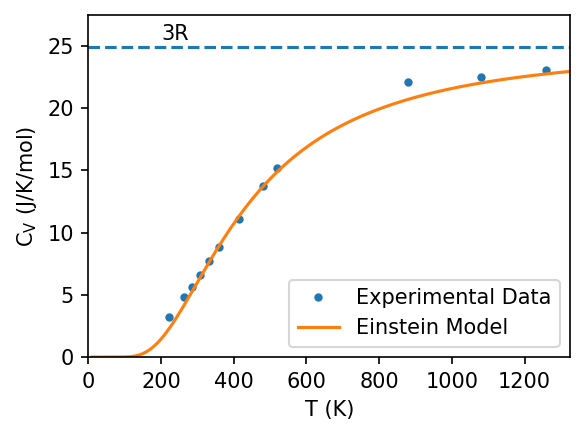

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy.units as u
import astropy.constants as c

#Read in the data
data = pd.read_csv("Diamond.csv")

#The Einstein paper has all of the heat capacities in cal/kelvin/mol, so need to hard code a unit conversion
calorie = u.def_unit('calorie', 4.184 * u.J)

#Now, set up arrays and values
temp = data.Temp.values*u.K
Cv = data.Cap.values*(calorie/u.K/u.mol).to(u.J/u.K/u.mol) # Convert Cv to SI

#Finally step is to calculate the heat capacity for the Einstein model, assuming T_E = 1325*u.K
T_E = 1325*u.K
T = np.arange(10,1325,10)*u.K # Making a wide temperature array to evaluate T over
x = T_E/T
Cv_Einstein = 3*c.R*(x**2*np.exp(x)/(np.exp(x)-1)**2)

plt.figure(figsize=[4,3], dpi=150)
plt.plot(temp,Cv,'.',label='Experimental Data')
plt.plot(T,Cv_Einstein,'-',label='Einstein Model')
plt.axhline(3*c.R.value,linestyle='--')
plt.text(200,25.5, '3R')
plt.xlabel(r"T (K)")
plt.ylabel(r"C$_{\rm V}$ (J/K/mol)")
plt.ylim(0,27.5)
plt.xlim(0,1325)
plt.legend()
plt.tight_layout()
plt.savefig("Figures/Einstein_Model_vs_Data.jpg")
plt.show()

So this picture of a solid being a lattice with phonons solves the heat capacity issue. However, experimental evidence gathered after Eintein's paper was published showed poor agreement between the measured heat capacity and the predicted heat capacity for low (<200 K) temperatures, which leads us on to Debye's model.

## The Debye model

The key difference between Einstein's theory and Debye's is that in the Einstein model, it is assumed that all of the atoms are vibrating about their equilibrium positions independantly with the exact same frequency. The Debye model builds on this by allowing the oscillators within the system to have a distribution of frequencies.

Fortunately, we have already developed part of the framework we need for this task. Recalling the definition of the density of states from Lecture 12, we will modify it to represent the density of vibrational states, $g(\omega)$. We will impose the requirement that if we intergate the density of vibrational states over the entire frequency range, we should get back the total number of phonons in our system, $3N$. That is
$$
    \int g(\omega) {\rm d} \omega = 3N
$$

Debye used the following knowledge to determine an appropriate distribution of frequencies - we know that vibrational waves will travel through the solid with a speed equal to the speed of sound of the solid. That is
$$
    \omega = v_{s}q
$$
where q is the wave vector of the lattice vibrations. The density of these vibrations is given as
$$
    g(q) {\rm d} q = \frac{4\pi q^2 {\rm d} q}{(2\pi/L)^3} \times 3
$$
where the factor of 3 comes from the allowed polarisations of the wave, and we have assumed the crystal is a cube of side $L$. Tidying up a bit gives
$$
    g(q) {\rm d} q = \frac{3 V q^2 {\rm d} q}{2\pi^2}
$$
which, in terms of $\omega$, is
$$
    g(\omega) {\rm d} \omega = \frac{3 V \omega^2 {\rm d} \omega}{2\pi^2 v_{s}^3}
$$
The next assumption Debye allowed for is that, since there is a maximum of $3N$ modes in the crystal, there exists a maximum frequency (the Debye frequency) such that
$$
    \int_0^{\omega_{\rm D}} g(\omega) {\rm d} \omega = 3N
$$
which, after substituting in for $g(\omega)$, gives
$$
    \omega_{\rm D} = \left( \frac{6 N \pi^2 v_{\rm s}^3 }{V} \right) ^{1/3}
$$
which also let's us write
$$
    g(\omega) {\rm d} \omega = \frac{9 N \omega^2 {\rm d} \omega}{\omega_{\rm D}^3}
$$
Now, we'll define the Debye temperature as
$$
    \Theta_{\rm D} = \frac{\hbar \omega_{\rm D}}{k_{\rm B}}
$$

So the question we now need to ask is "is the predicted heat capacity versus temperature from this model a better match to our data?". Let's work out an expression for it and see.

Starting with the partition function, we'll have
$$
    \ln(Z) = \int_0^{\omega_{\rm D}} {\rm d} \omega \; g(\omega) \; ln \left[ \frac{e^{-\hbar \omega \beta/2}}{1-e^{-\hbar \omega \beta}} \right]
$$
Breaking this integral up gives
$$
    \ln(Z) = -\int_0^{\omega_{\rm D}} \; \frac{1}{2} \hbar \omega \beta g(\omega)  {\rm d} \omega + \int_0^{\omega_{\rm D}} \; g(\omega) \ln[1-e^{-\hbar \omega \beta}] {\rm d} \omega
$$
which in turn gives
$$
    \ln(Z) = -\frac{9}{8} N \hbar \omega_{\rm D} \beta -\frac{9 N}{\omega_{\rm D}^3} \int_0^{\omega_{\rm D}} \omega^2 \ln[1-e^{-\hbar \omega \beta}] {\rm d} \omega
$$
The internal energy is then
$$
    U = - \frac{\partial \ln(Z)}{\partial \beta} = -\frac{9}{8} N \hbar \omega_{\rm D} + \frac{9 N \hbar}{\omega_{\rm D}^3} \int_0^{\omega_{\rm D}} \frac{\omega^2} {e^{\hbar \omega \beta}-1} {\rm d} \omega
$$
Finally, the heat capacity is then
$$
    C_{\rm V} = \left( \frac{\partial \langle U \rangle}{\partial T} \right)_V
$$
$$
    C_{\rm V} = \frac{9N \hbar}{\omega_{\rm D}^3} \int_0^{\omega_{\rm D}} \frac{-\omega^3 {\rm d} \omega}{e^{\hbar \omega \beta}-1} e^{\hbar \omega \beta} \left( - \frac{\hbar \omega} {k_{\rm B} T^2} \right)
$$
which simplifies to
$$
    C_{\rm V} = \frac{9 R}{x_{\rm D}^3}  \int_0^{x_{\rm D}} \frac{x^4e^{x}}{(e^{x}-1)^2}
$$
where $x=\hbar \beta \omega$ and $x_{\rm D}=\hbar \beta \omega_{\rm D}$.

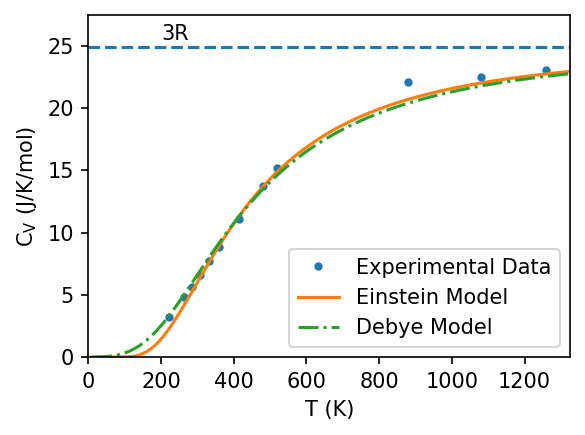

In [13]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
import pandas as pd
import astropy.units as u
import astropy.constants as c

def f(x):
    #This is simply the function in the integral above
    return x**4*np.exp(x)/(np.exp(x)-1)**2

#First, we need to calculate x_D for all temperatures, assuming T_D = 1800*u.K
T_D = 1800*u.K
x_Ds = T_D/T

#We now need to loop over the integration, for each x_D
Cv_Debye = np.array([])*u.J/u.K/u.mol

for x_D in x_Ds:
    res, err = quad(f, 0.0, x_D) # This numerical integration function returns both the integrated value and an estimate of the error
    Cv_Debye = np.append(Cv_Debye,9*c.R*res/x_D**3)

plt.figure(figsize=[4,3], dpi=150)
plt.plot(temp,Cv,'.',label='Experimental Data')
plt.plot(T,Cv_Einstein,'-',label='Einstein Model')
plt.plot(T,Cv_Debye,'-.',label='Debye Model')
plt.axhline(3*c.R.value,linestyle='--')
plt.text(200,25.5, '3R')
plt.xlabel(r"T (K)")
plt.ylabel(r"C$_{\rm V}$ (J/K/mol)")
plt.ylim(0,27.5)
plt.xlim(0,1325)
plt.legend()
plt.tight_layout()
plt.savefig("Figures/Debye_Einstein_Model_vs_Data.jpg")
plt.show()